# Checking compatibility using simulation

Before interpreting any of these results I need to make sure that what the game outputs is correct. The aim of this jupyter notebook is to convince me that the source code works as expected.

In [1]:
import ambulance_game as abg
import numpy as np
import nashpy as nash
import matplotlib.pyplot as plt
import functools

### Compare game outputs with Markov and simulation

##### Markov

In [2]:
lambda_2 = 2

lambda_1_1 = 0.1
mu_1 = 2
num_of_servers_1 = 2
system_capacity_1 = 6
buffer_capacity_1 = 2

lambda_1_2 = 0.1
mu_2 = 2
num_of_servers_2 = 2
system_capacity_2 = 6
buffer_capacity_2 = 2

target = 2

In [3]:
payoff_matrices_markov = abg.game.get_payoff_matrices(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=mu_1,
    mu_2=mu_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    target=target,
    alpha=0.2,
)

In [4]:
A = payoff_matrices_markov[0] + 1
B = payoff_matrices_markov[1] + 1
my_game = nash.Game(A, B)

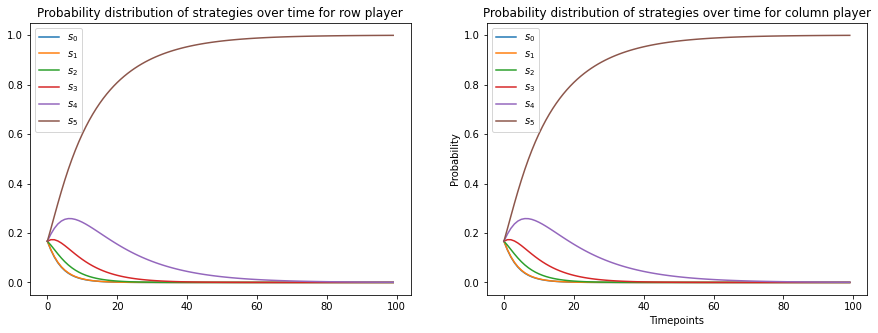

In [5]:
xs, ys = my_game.asymmetric_replicator_dynamics(timepoints=np.linspace(1, 100000, 100))
plt.figure(figsize=(15, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(xs) 
plt.title("Probability distribution of strategies over time for row player") 
plt.legend([f"$s_{i}$" for i in range(len(xs[0]))]) 
plt.subplot(1, 2, 2) 
plt.plot(ys) 
plt.xlabel("Timepoints") 
plt.ylabel("Probability") 
plt.title("Probability distribution of strategies over time for column player") 
plt.legend([f"$s_{i}$" for i in range(len(ys[0]))])

##### Simulation

In [6]:
lambda_2 = 2

lambda_1_1 = 0.1
mu_1 = 2
num_of_servers_1 = 2
system_capacity_1 = 6
buffer_capacity_1 = 2

lambda_1_2 = 0.1
mu_2 = 2
num_of_servers_2 = 2
system_capacity_2 = 6
buffer_capacity_2 = 2

target = 2

In [11]:
payoff_matrices = abg.game.get_payoff_matrices(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=mu_1,
    mu_2=mu_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    target=target,
    alpha=0.2,
    use_simulation=True,
    runtime=2000,
    num_of_trials=10,
    warm_up_time=10,
    seed_num_1=1,
    seed_num_2=1
)

In [12]:
A = payoff_matrices[0] + 1
B = payoff_matrices[1] + 1
my_game = nash.Game(A, B)

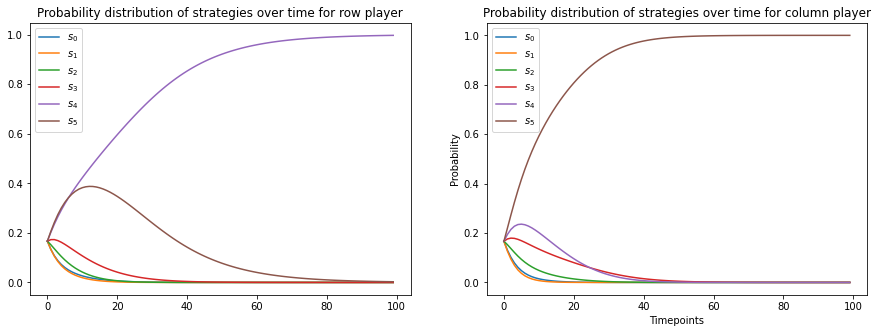

In [33]:
xs, ys = my_game.asymmetric_replicator_dynamics(timepoints=np.linspace(1, 100000, 100))
plt.figure(figsize=(15, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(xs) 
plt.title("Probability distribution of strategies over time for row player") 
plt.legend([f"$s_{i}$" for i in range(len(xs[0]))]) 
plt.subplot(1, 2, 2) 
plt.plot(ys) 
plt.xlabel("Timepoints") 
plt.ylabel("Probability") 
plt.title("Probability distribution of strategies over time for column player")
plt.legend([f"$s_{i}$" for i in range(len(ys[0]))]) 

In [73]:
(A * 100) - 99, (B * 100) - 99

(array([[0.8941761 , 0.88280418, 0.89888413, 0.90034105, 0.90034105,
         0.90034105],
        [0.89821406, 0.88996323, 0.89516479, 0.90617563, 0.89561751,
         0.89193399],
        [0.93255858, 0.91685128, 0.90748752, 0.90744318, 0.90645888,
         0.89284592],
        [0.96060415, 0.93987544, 0.92398673, 0.90952089, 0.90672229,
         0.9035187 ],
        [0.98510273, 0.95870872, 0.94007932, 0.9300096 , 0.90994015,
         0.91691021],
        [0.98884818, 0.96552146, 0.94826074, 0.93012385, 0.91161972,
         0.91002182]]),
 array([[0.8941761 , 0.89899567, 0.93657225, 0.96060415, 0.98510273,
         0.98884818],
        [0.89959852, 0.88996323, 0.9090959 , 0.93713465, 0.95034553,
         0.97697983],
        [0.87843358, 0.89997053, 0.90748752, 0.91999794, 0.94415337,
         0.95577947],
        [0.90034105, 0.8898379 , 0.89689891, 0.90952089, 0.91958676,
         0.93563214],
        [0.90034105, 0.89312279, 0.90706986, 0.91588104, 0.90994015,
         0.92918689

### Observations

**First observation**: I would expect each matrix to be the transpose of the other, since two identical models are used (with the same seed numbers). This is not the case here.

**Second observation**: Since the column player plays $s_5$ (last column) the row player's best response is $s_4$. This does not match with the markov model case and it is odd since I expected the two simulations to act the same way (since the same seed number was used).
```
    A[5,6] = 0.91691021 > 0.91002182 = A[6,6]
```
That being said python has to deal with very small numbers here and I think it's the brentq algorithm that produces the different results. Currently I cannot see how it is not a problem.

# Checking state-server dependent service rate

Run simulation 2 times:
- When using $\mu_1=\mu_2=2$
- When using state-server dependent dist. where $\mu_{(u,v)}^{i, k} = 2$

In [2]:
lambda_2 = 2

lambda_1_1 = 0.1
mu_1 = 2
num_of_servers_1 = 2
system_capacity_1 = 6
buffer_capacity_1 = 2

lambda_1_2 = 0.1
mu_2 = 2
num_of_servers_2 = 2
system_capacity_2 = 6
buffer_capacity_2 = 2

target = 2

In [3]:
payoff_matrices_exponential = abg.game.get_payoff_matrices(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=mu_1,
    mu_2=mu_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    target=target,
    alpha=0.2,
    use_simulation=True,
    runtime=100,
    num_of_trials=1,
    warm_up_time=10,
    seed_num_1=1,
    seed_num_2=1
)
# payoff_matrices_exponential

In [5]:
A = payoff_matrices_exponential[0] + 1
B = payoff_matrices_exponential[1] + 1
my_game = nash.Game(A, B)

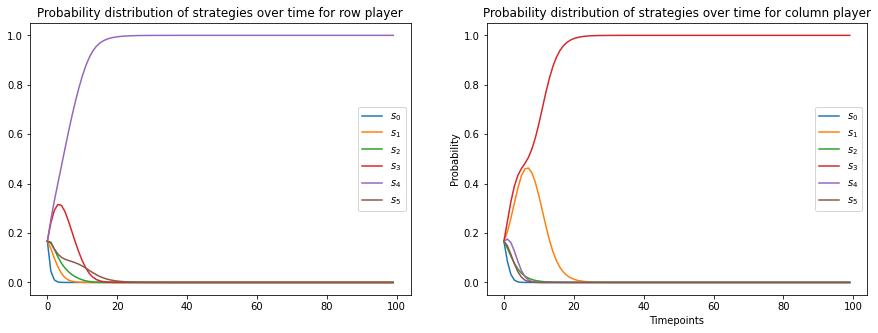

In [6]:
xs, ys = my_game.asymmetric_replicator_dynamics(timepoints=np.linspace(1, 100000, 100))
plt.figure(figsize=(15, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(xs) 
plt.title("Probability distribution of strategies over time for row player") 
plt.legend([f"$s_{i}$" for i in range(len(xs[0]))]) 
plt.subplot(1, 2, 2) 
plt.plot(ys) 
plt.xlabel("Timepoints") 
plt.ylabel("Probability") 
plt.title("Probability distribution of strategies over time for column player") 
plt.legend([f"$s_{i}$" for i in range(len(ys[0]))]) 

In [24]:
rates_1 = {}
rates_2 = {}
for server_1, server_2 in zip(range(1, num_of_servers_1 + 1), range(1, num_of_servers_2 + 1)):
    rates_1[server_1] = {
        (u, v): mu_1 for u in range(buffer_capacity_1 + 1) for v in range(system_capacity_1 + 1)
    }
    rates_2[server_2] = {
        (u, v): mu_2 for u in range(buffer_capacity_2 + 1) for v in range(system_capacity_2 + 1)
    }

In [12]:
payoff_matrices_dependent = abg.game.get_payoff_matrices(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=rates_1,
    mu_2=rates_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    target=target,
    alpha=0.2,
    use_simulation=True,
    runtime=100,
    num_of_trials=1,
    warm_up_time=10,
    seed_num_1=1,
    seed_num_2=1,
    use_cache=False
)
# payoff_matrices_dependent

In [13]:
A = payoff_matrices_dependent[0] + 1
B = payoff_matrices_dependent[1] + 1
my_game = nash.Game(A, B)

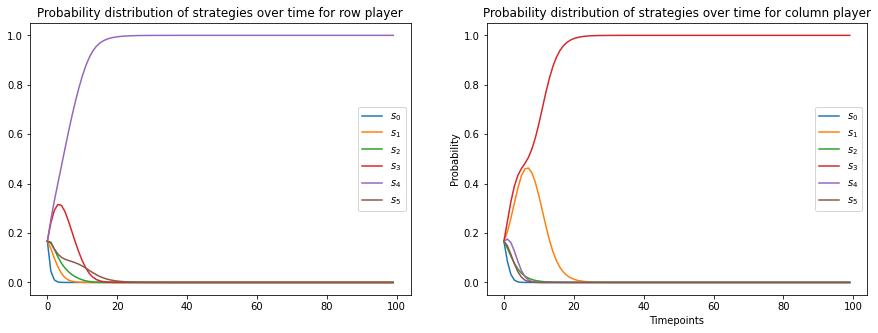

In [14]:
xs, ys = my_game.asymmetric_replicator_dynamics(timepoints=np.linspace(1, 100000, 100))
plt.figure(figsize=(15, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(xs) 
plt.title("Probability distribution of strategies over time for row player") 
plt.legend([f"$s_{i}$" for i in range(len(xs[0]))]) 
plt.subplot(1, 2, 2) 
plt.plot(ys) 
plt.xlabel("Timepoints") 
plt.ylabel("Probability") 
plt.title("Probability distribution of strategies over time for column player") 
plt.legend([f"$s_{i}$" for i in range(len(ys[0]))]) 

## One server is faster when crowded

In [43]:
lambda_2 = 2

lambda_1_1 = 0.1
mu_1 = 2
num_of_servers_1 = 2
system_capacity_1 = 6
buffer_capacity_1 = 2

lambda_1_2 = 0.1
mu_2 = 2
num_of_servers_2 = 2
system_capacity_2 = 6
buffer_capacity_2 = 2

target = 2

In [44]:
# Initialise rates
rates_1 = {}
rates_2 = {}
for server_1, server_2 in zip(range(1, num_of_servers_1 + 1), range(1, num_of_servers_2 + 1)):
    rates_1[server_1] = {(u, v): mu_1 for u in range(buffer_capacity_1 + 1) for v in range(system_capacity_1 + 1)}
    rates_2[server_2] = {(u, v): mu_2 for u in range(buffer_capacity_2 + 1) for v in range(system_capacity_2 + 1)}

# Adjust rates
for server_1, server_2 in zip(range(1, num_of_servers_1 + 1), range(1, num_of_servers_2 + 1)):
    for u_1, u_2 in zip(range(buffer_capacity_1 + 1), range(buffer_capacity_2 + 1)):
        for v_1, v_2 in zip(range(system_capacity_1 + 1), range(system_capacity_2 + 1)):
            if server_1 == 1 and u_1 >= 1 and v_1 >= 4:
                rates_1[server_1][(u_1, v_1)] = mu_1 * 3
            if server_2 == 1 and u_2 >= 1 and v_2 >= 4:
                rates_2[server_2][(u_2, v_2)] = mu_2 * 3

In [37]:
payoff_matrices_dependent = abg.game.get_payoff_matrices(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=rates_1,
    mu_2=rates_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    target=target,
    alpha=0.2,
    use_simulation=True,
    runtime=1000,
    num_of_trials=1,
    warm_up_time=50,
    seed_num_1=1,
    seed_num_2=1,
    use_cache=False
)
# payoff_matrices_dependent

In [38]:
A = payoff_matrices_dependent[0] + 1
B = payoff_matrices_dependent[1] + 1
my_game = nash.Game(A, B)

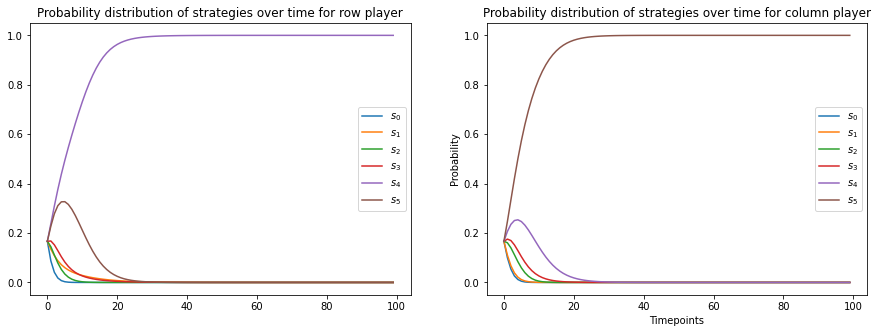

In [40]:
xs, ys = my_game.asymmetric_replicator_dynamics(timepoints=np.linspace(1, 100000, 100))
plt.figure(figsize=(15, 5)) 
plt.subplot(1, 2, 1) 
plt.plot(xs) 
plt.title("Probability distribution of strategies over time for row player") 
plt.legend([f"$s_{i}$" for i in range(len(xs[0]))]) 
plt.subplot(1, 2, 2) 
plt.plot(ys) 
plt.xlabel("Timepoints") 
plt.ylabel("Probability") 
plt.title("Probability distribution of strategies over time for column player") 
plt.legend([f"$s_{i}$" for i in range(len(ys[0]))]) 

## Manage traffic intensity + runtime impact

In [23]:
def plot_ard(payoff_matrices, ylim=(None, None), max_timepoint=100000):
    A = payoff_matrices[0] + 1
    B = payoff_matrices[1] + 1
    my_game = nash.Game(A, B)
    xs, ys = my_game.asymmetric_replicator_dynamics(timepoints=np.linspace(1, max_timepoint, 100))
    plt.figure(figsize=(15, 5)) 
    plt.subplot(1, 2, 1) 
    plt.plot(xs) 
    plt.ylim(ylim)
    plt.title("Probability distribution of strategies over time for row player") 
    plt.legend([f"$s_{i}$" for i in range(len(xs[0]))]) 
    plt.subplot(1, 2, 2) 
    plt.plot(ys) 
    plt.ylim(ylim)
    plt.xlabel("Timepoints") 
    plt.ylabel("Probability") 
    plt.title("Probability distribution of strategies over time for column player") 
    plt.legend([f"$s_{i}$" for i in range(len(ys[0]))]) 


In [59]:
lambda_2 = 2

lambda_1_1 = 2
mu_1 = 2
num_of_servers_1 = 2
system_capacity_1 = 6
buffer_capacity_1 = 2

lambda_1_2 = 2
mu_2 = 2
num_of_servers_2 = 2
system_capacity_2 = 6
buffer_capacity_2 = 2

target = 2

## Markov example (Baseline)

In [57]:
payoff_matrices_markov = abg.game.get_payoff_matrices(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=mu_1,
    mu_2=mu_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    target=target,
    alpha=0.2,
)

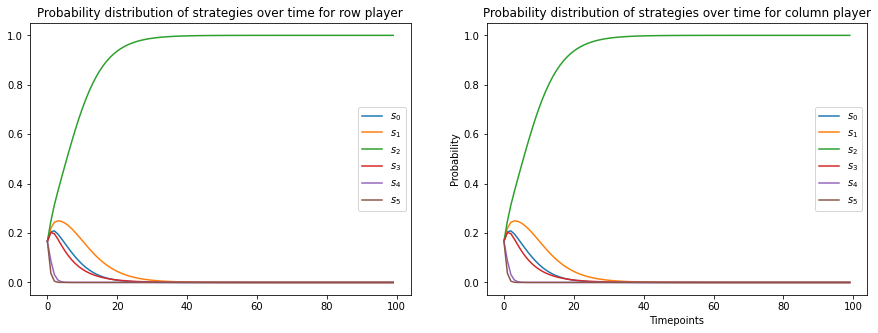

In [58]:
plot_ard(payoff_matrices_markov)

## Simulation: Runtime = 100

In [63]:
payoff_matrices_run_100 = abg.game.get_payoff_matrices(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=mu_1,
    mu_2=mu_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    target=target,
    alpha=0.2,
    use_simulation=True,
    runtime=100,
    num_of_trials=1,
    warm_up_time=10,
    seed_num_1=1,
    seed_num_2=1,
    use_cache=False
)
# payoff_matrices_dependent

c:\users\c1400990\desktop\phd\rsch\ambulancedecisiongame\src\ambulance_game\simulation\simulation.py:860: RuntimeWarning: Mean of empty slice
  mean_blocking_time_1 = np.nanmean([np.nanmean(b) for b in all_blocking_times_1])
c:\users\c1400990\desktop\phd\rsch\ambulancedecisiongame\src\ambulance_game\simulation\simulation.py:861: RuntimeWarning: Mean of empty slice
  mean_blocking_time_2 = np.nanmean([np.nanmean(b) for b in all_blocking_times_2])


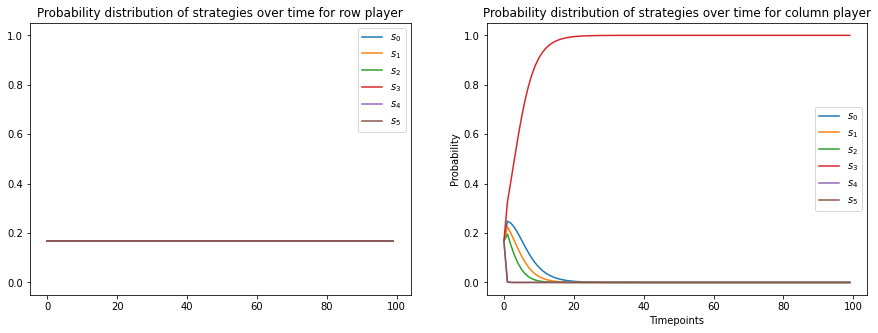

In [65]:
plot_ard(payoff_matrices_run_100, ylim=(-0.05, 1.05))

## Simulation: Runtime = 500

In [68]:
payoff_matrices_run_500 = abg.game.get_payoff_matrices(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=rates_1,
    mu_2=rates_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    target=target,
    alpha=0.2,
    use_simulation=True,
    runtime=500,
    num_of_trials=1,
    warm_up_time=10,
    seed_num_1=1,
    seed_num_2=1,
    use_cache=False
)

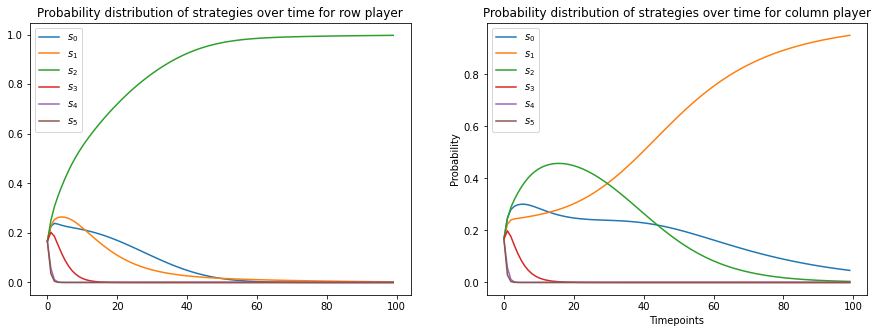

In [69]:
plot_ard(payoff_matrices_run_500)

## Simulation: Runtime = 1000

In [70]:
payoff_matrices_run_1000 = abg.game.get_payoff_matrices(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=rates_1,
    mu_2=rates_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    target=target,
    alpha=0.2,
    use_simulation=True,
    runtime=1000,
    num_of_trials=1,
    warm_up_time=10,
    seed_num_1=1,
    seed_num_2=1,
    use_cache=False
)

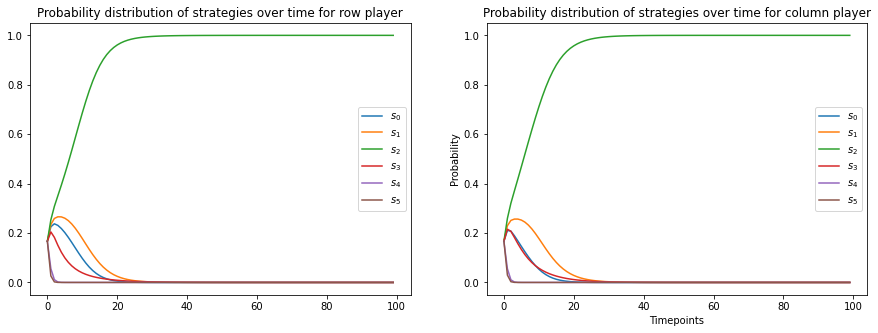

In [54]:
plot_ard(payoff_matrices_run_1000)

## Simulation: runtime = 2000

In [71]:
payoff_matrices_run_2000 = abg.game.get_payoff_matrices(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=rates_1,
    mu_2=rates_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    target=target,
    alpha=0.2,
    use_simulation=True,
    runtime=2000,
    num_of_trials=1,
    warm_up_time=10,
    seed_num_1=1,
    seed_num_2=1,
    use_cache=False
)

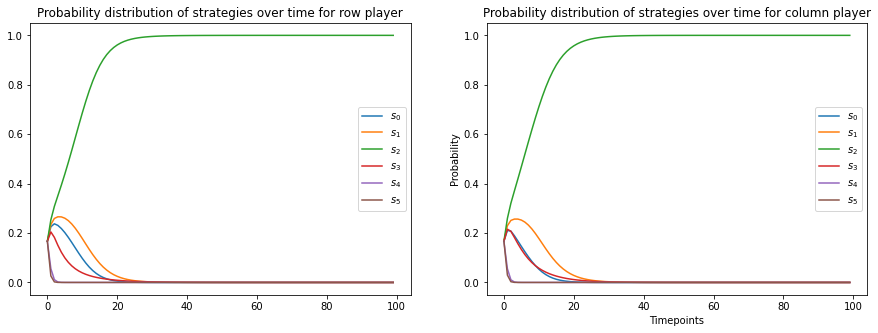

In [72]:
plot_ard(payoff_matrices_run_1000)

## Different seed numbers

##### Example 1

In [15]:
lambda_2 = 2

lambda_1_1 = 2
mu_1 = 2
num_of_servers_1 = 2
system_capacity_1 = 6
buffer_capacity_1 = 2

lambda_1_2 = 2
mu_2 = 2
num_of_servers_2 = 2
system_capacity_2 = 6
buffer_capacity_2 = 2

target = 2

In [17]:
rates_1 = {}
rates_2 = {}
for server_1, server_2 in zip(range(1, num_of_servers_1 + 1), range(1, num_of_servers_2 + 1)):
    rates_1[server_1] = {(u, v): mu_1 for u in range(buffer_capacity_1 + 1) for v in range(system_capacity_1 + 1)}
    rates_2[server_2] = {(u, v): mu_2 for u in range(buffer_capacity_2 + 1) for v in range(system_capacity_2 + 1)}

In [18]:
payoff_matrices_different_seeds = abg.game.get_payoff_matrices(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=rates_1,
    mu_2=rates_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    target=target,
    alpha=0.2,
    use_simulation=True,
    runtime=2000,
    num_of_trials=1,
    warm_up_time=10,
    seed_num_1=3,
    seed_num_2=4,
    use_cache=False
)

In [24]:
plot_ard(payoff_matrices_different_seeds)

NameError: name 'payoff_matrices_different_seeds' is not defined

##### Example 2

In [30]:
payoff_matrices_different_seeds = abg.game.get_payoff_matrices(
    lambda_2=lambda_2,
    lambda_1_1=lambda_1_1,
    lambda_1_2=lambda_1_2,
    mu_1=rates_1,
    mu_2=rates_2,
    num_of_servers_1=num_of_servers_1,
    num_of_servers_2=num_of_servers_2,
    system_capacity_1=system_capacity_1,
    system_capacity_2=system_capacity_2,
    buffer_capacity_1=buffer_capacity_1,
    buffer_capacity_2=buffer_capacity_2,
    target=target,
    alpha=0.2,
    use_simulation=True,
    runtime=2000,
    num_of_trials=1,
    warm_up_time=10,
    seed_num_1=10,
    seed_num_2=20,
    use_cache=False
)

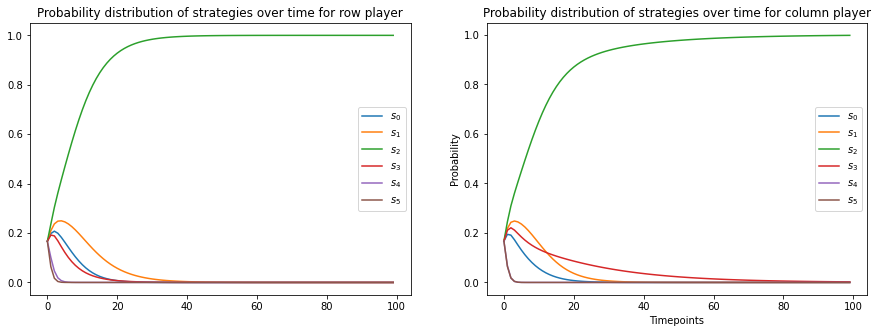

In [31]:
plot_ard(payoff_matrices_different_seeds)

## Experiments

In [3]:
lambda_2 = 2

lambda_1_1 = 0.1
mu_1 = 2
num_of_servers_1 = 2
system_capacity_1 = 6
buffer_capacity_1 = 2

lambda_1_2 = 0.1
mu_2 = 2
num_of_servers_2 = 2
system_capacity_2 = 6
buffer_capacity_2 = 2

target = 2

In [17]:
all_payoff_matrices_A, all_payoff_matrices_B = [], []
for seed in range(1, 11):
    A, B, _ = abg.game.get_payoff_matrices(
        lambda_2=lambda_2,
        lambda_1_1=lambda_1_1,
        lambda_1_2=lambda_1_2,
        mu_1=mu_1,
        mu_2=mu_2,
        num_of_servers_1=num_of_servers_1,
        num_of_servers_2=num_of_servers_2,
        system_capacity_1=system_capacity_1,
        system_capacity_2=system_capacity_2,
        buffer_capacity_1=buffer_capacity_1,
        buffer_capacity_2=buffer_capacity_2,
        target=target,
        alpha=0.2,
        use_simulation=True,
        runtime=1000,
        num_of_trials=1,
        warm_up_time=50,
        seed_num_1=seed + 100,
        seed_num_2=seed + 1000, 
    )
    A += 1
    B += 1
    all_payoff_matrices_A.append(A)
    all_payoff_matrices_B.append(B)

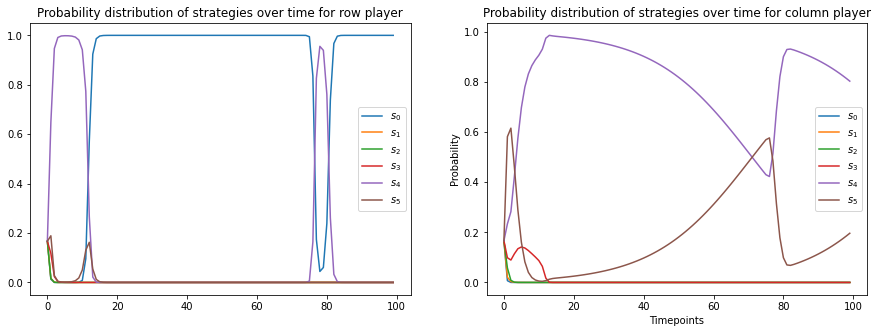

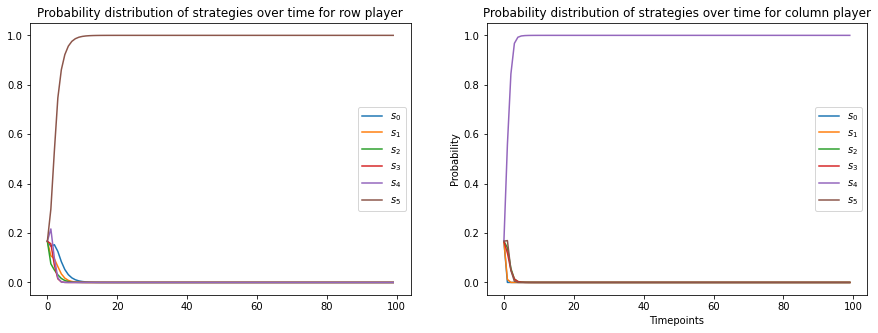

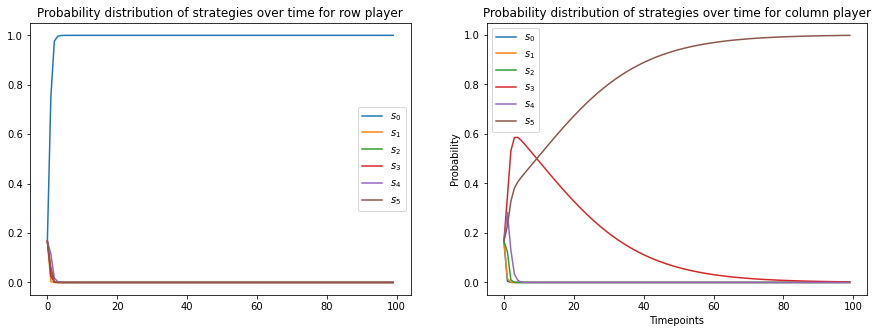

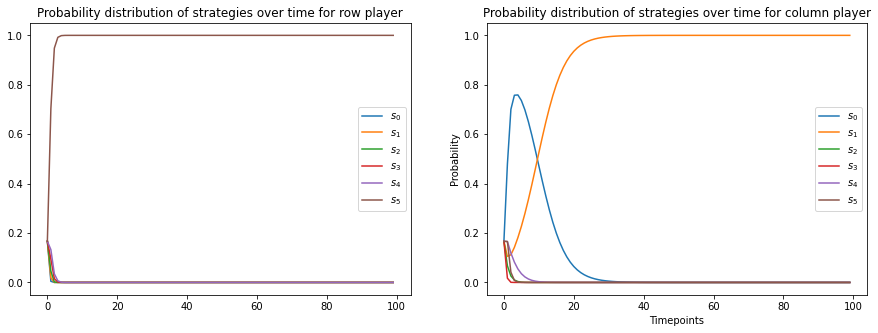

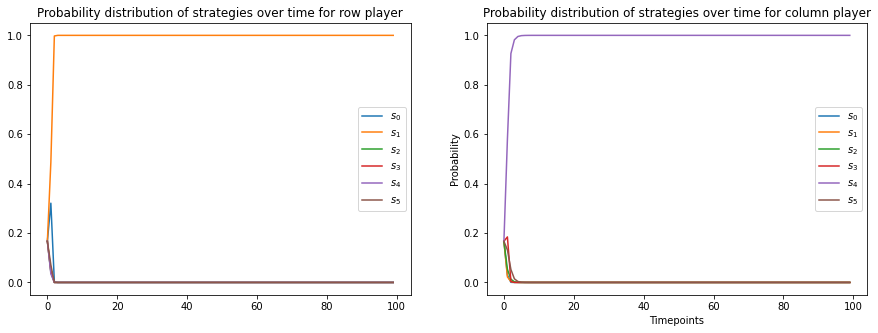

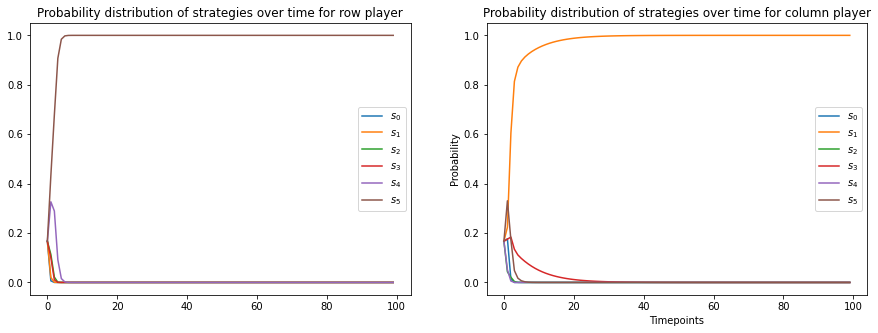

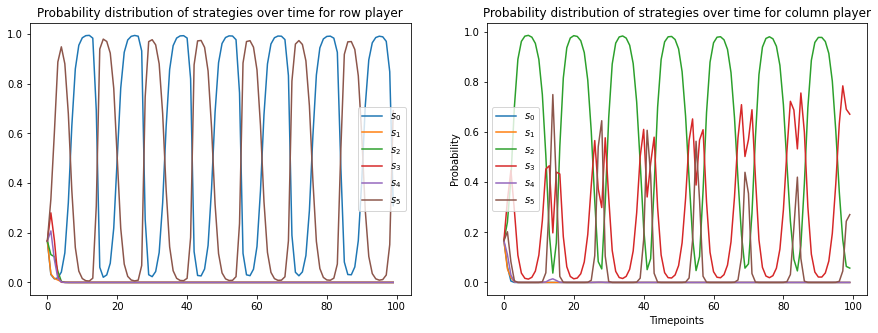

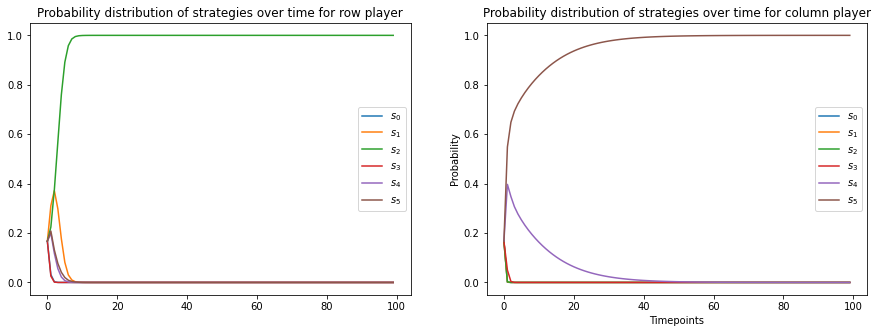

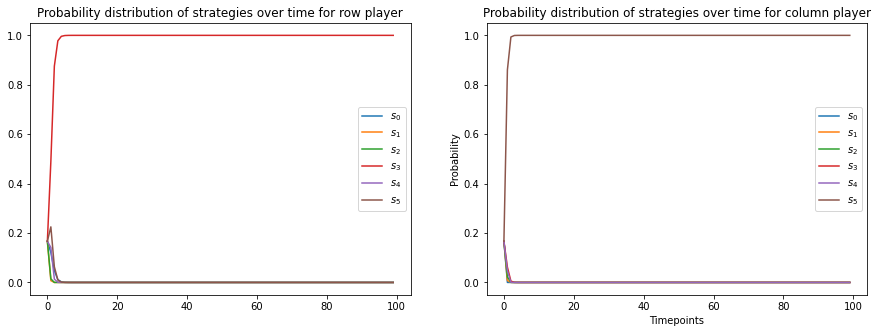

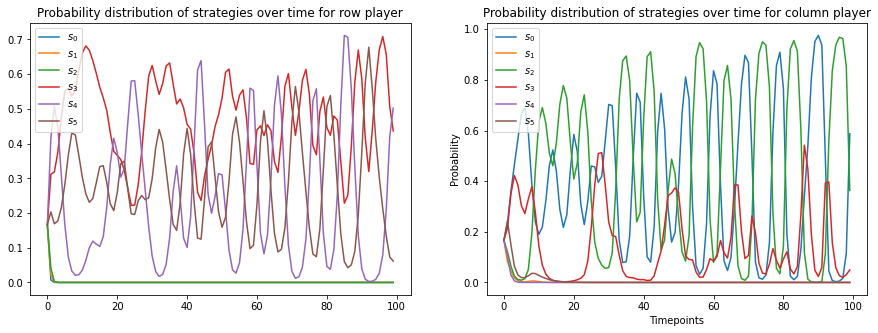

In [33]:
for A, B in zip(all_payoff_matrices_A, all_payoff_matrices_B):
    plot_ard((A, B), max_timepoint=700000)